# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import random
from numpy.random import normal
from scipy.stats import norm
from matplotlib import pyplot

In [9]:
col_Names=["Sequence", "Coverage"]
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,names=col_Names)
data.head(5)

,Sequence,Coverage
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160


# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [26]:
def pdf_exp(lam,x):
  return lam*np.exp(-lam*x)

likelihood1=1
likelihood2=1

for a in data['Coverage'].values[:]:
  likelihood1 = likelihood1 * pdf_exp(lam=2,x=a)
  likelihood2 = likelihood2 * pdf_exp(lam=1,x=a)
log_likelihood1=np.log(likelihood1)
log_likelihood2=np.log(likelihood2)
print('log_likelihood1-log_likelihood2:', log_likelihood1-log_likelihood2)

log_likelihood1-log_likelihood2: 20.366416970604874


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

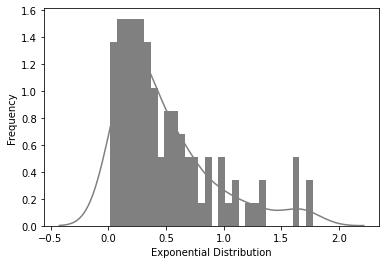

In [31]:
from scipy.stats import expon
# data_expon_1 = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data['Coverage'].values,
                  kde=True,
                  bins=30,
                  color='grey',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

In [0]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col

Mean=40.097, Standard Deviation=6.029


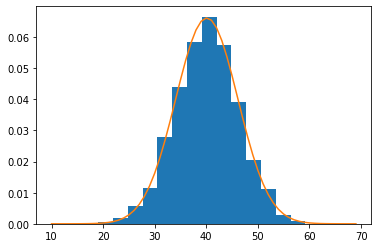

log likelihood: 12862.206950784697


In [0]:
# generate a sample
import math
import scipy.optimize as optimize

random.seed(101)
size=4000;
sample = normal(loc=40, scale=6, size=4000)
# calculate parameters
sample_mean = sample.mean()
sample_std = sample.std()
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
# define the distribution
dist = norm(sample_mean, sample_std)
# sample probabilities for a range of outcomes
values = [value for value in range(10, 70)]
probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
pyplot.hist(sample, bins=15, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

l1= size*math.log(2*math.pi*(sample_std**2))/2 + np.sum(((sample-sample_mean)**2)/(2 * (sample_std**2)))
ll = size*math.log(2*math.pi*(sample_std**2))/2 + np.sum(((sample-sample_mean)**2)/(2 * (sample_std**2)))
print('log likelihood:', ll)

### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
col_Names=["Sequence", "Coverage"]
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',names=col_Names)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',names=col_Names)

In [0]:
# Student's t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind

Find the parameters required to compute the T statistic

In [35]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

# seed the random number generator
seed(101)
# generate two independent samples from the csv files
data1 = sample1['Coverage'].values[:]
data2 = sample2['Coverage'].values[:]
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal = YES')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal = YES')

t=-16.821, df=148, cv=1.655, p=0.000
Reject the null hypothesis that the means are equal = YES
Reject the null hypothesis that the means are equal = YES


Plot the distribution of both the samples to visualize

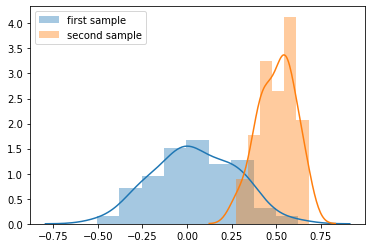

In [0]:
sns.distplot(sample1[1].values)
sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()